# Legendre Functions

Series expansions are used in a variety of circumstances:
- When we need a tractable approximation to some ugly equation
- To transform between equivalent ways of looking at a problem (e.g. time domain vs frequency domain)
- When they are (part of) a solution to a particular class of differential equation

For approximations, there is an important divide between getting the best fit *near a point* (e.g. Taylor series) and getting the best fit *over an interval*. This notebook deals with one example of the latter; there is a separate notebook for Taylor expansions and others for Fourier, Bessel, etc.

## Fitting over an interval

What is the best (tractable) series approximating my function across some range of values? What matters is an overall best fit (e.g. least-squares deviation) across the range, and we can't tolerate wild divergences as with the Taylor series.

There are various series which are useful in different contexts, but a common property is that the terms are *orthogonal* over some interval $[a,b]$. If $f(t)$ is a real-valued function their *inner product* is defined as

$$ \langle f(m t),f(n t) \rangle   \colon =\int _a^b f(m t) f(n t) \,  dt $$

For orthogonal functions, this is non-zero if $m=n$ and zero if $m \ne n$, i.e. 

$$\langle f(m t),f(n t) \rangle = a \delta_{mn}$$

where $\delta$ is the Kronecker delta.  If $a = 1$ the functions are said to be orthonormal.

## The Legendre differential equation

This is of the form

$$ (1 - x^2)y'' -2x y' + l(l+1)y = 0 $$

where $l$ is a constant. The most useful solutions are the Legendre polynomials, where $y = P_l(x)$.

## Legendre Polynomials

These are "just" polynomials, so maybe conceptually simpler than, for example, Bessel functions. Their special feature is that the coefficients are chosen so that they are mutually orthogonal over the range $[-1,1]$. 

They are given by the formula

$$ P_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n} (x^2 -1)^n $$

They tend to crop up in the sort of problems which naturally use spherical coordinates and/or spherical harmonics, such as fluctuations in the CMB, "sunquakes" in our local star or (at the other end of the scale range) electron orbitals in the hydrogen atom.

## Associated Legendre Functions

the function $P_n^m(x)$ is of degree $n$ and order $m$. It is related to the $n$th order polynomial $P_n(x)$ by

$$ P_n^m(x) = (-1)^m (1-x^2)^{m/2}\ \frac{d^m P_n(x)}{dx^m} $$

Order zero functions are just the corresponding Legendre polynomials: $P_n^0(x) \equiv P_n(x)$.

## Software

Start with a few basics, then we can get mathematical.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

How to work with Legendre functions in Python? A quick Google search turns up quite a few possibilities, though it may not be immediately obvious how these relate to one another:
- `scipy.special.legendre()`
- `scipy.special.lpmn()` and `.lpmv()`
- `numpy.polynomial.legendre`
- `sympy.functions.special.polymomials.legendre()`
- `sympy.functions.special.polymomials.assoc_legendre()`
- `sympy.polys.orthopolys.legendre_poly()`
- `mpmath.legendre()`

### scipy.special

This one is relatively simple. Calling `legendre(n)` returns the nth-order polynomial as a function which can then itself be called with one or more x-values.

In [3]:
import scipy.special as sp
P_3_sp = sp.legendre(3)
display(P_3_sp)

poly1d([ 2.5,  0. , -1.5,  0. ])

In [4]:
x10 = np.linspace(-1, 1, 10)
display(P_3_sp(x10))

array([-1.        , -0.00960219,  0.40466392,  0.40740741,  0.16323731,
       -0.16323731, -0.40740741, -0.40466392,  0.00960219,  1.        ])

For the associated Legendre functions there are a couple of related SciPy functions which take different approaches to vector input and output. `scipy.special.lpmn(m, n, x)` will only take a single scalar $x$, but returns an $(m+1, n+1)$ array of results for all orders $0 \dots m$ and degrees $0 \dots n$. In contrast, `scipy.special.lpmv(m, n, x)` accepts arrays of $x$ and returns results for just the specified $m$ and $n$.

In [23]:
xs = np.linspace(0, 1, 100)
m = 1
n = 2
P_lm, _ = sp.lpmn(m, n, xs[5])
display(P_lm.shape)

P_lmv = sp.lpmv(m, n, xs)
display(P_lmv.shape)

### numpy.polynomial

This is less simple and needs more exploration. Start like this, then read whatever documentation you can find.

In [5]:
from numpy.polynomial import Legendre as P
P_3_npl = P([3])
display(P_3_npl)

Legendre([3.], domain=[-1,  1], window=[-1,  1])

### sympy.functions.special.polymomials

This is symbolic math, which will give you differentiation, integration, etc, as well as nice $LaTeX$ output. Not so convenient for plotting.

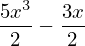

In [6]:
from sympy import legendre, assoc_legendre, init_printing
init_printing()
from sympy.abc import x

display(legendre(3, x))
display(assoc_legendre(3, 2, x))

### sympy.polys.orthopolys

Sort of like sympy.functions.special.polymomials, but with some different options.

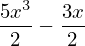

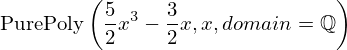

In [7]:
from sympy import legendre_poly
display(legendre_poly(3))
display(legendre_poly(3, polys=True))

### mpmath

This is aimed at arbitrary-precision floating point arithmetic. It doesn't seem to do symbolic math like SymPy or (more surprisingly?) handle array input like SciPy.

If you don't have the `mpmath` package installed, don't worry: this is the only cell that tries to use it.

In [8]:
import mpmath as mp
for x1 in np.arange(0, 1, 0.2):
    display(mp.legendre(3, x1))

mpf('0.0')

mpf('-0.28000000000000003')

mpf('-0.44')

mpf('-0.35999999999999988')

mpf('0.08000000000000014')

### Provisional conclusions

It seems like `sympy.functions.special.polymomials` offers the simplest way to do symbolic math, and `scipy.special` the easiest way to do numerical calculations. Other packages no doubt have more sophisticated capabilities but I'm not the right person to judge.

The first few __Legendre polymomials__ look like this. Note that they are alternately odd/even functions.

In [9]:
from IPython.display import Math
from sympy import latex
from sympy.abc import x

for i in range(6):
    l_i = latex(legendre(i, x))
    display(Math('P_{} = {}'.format(i, l_i)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The first few __associated Legendre functions__:

In [10]:
for i in range(4):
    for j in range(i):
        l_ij = latex(assoc_legendre(i, j, x))
        display(Math('P_{}^{} = {}'.format(i, j, l_ij)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

__Plotting__ the first few Legendre polymomials over the range where they are orthogonal:

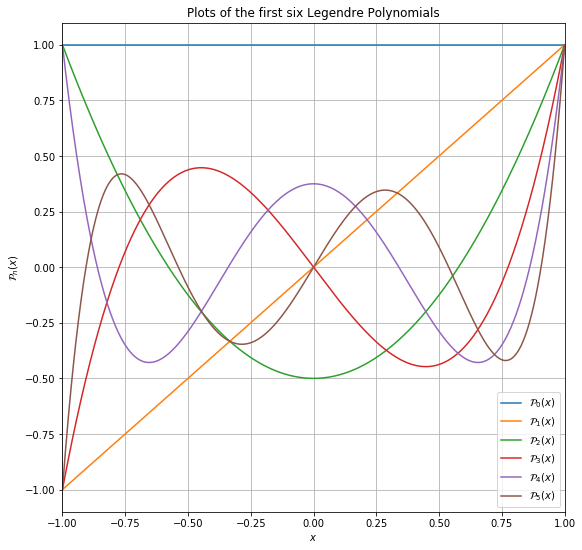

In [11]:
import scipy.special as sp

xlims = (-1, 1)
x = np.linspace(xlims[0], xlims[1], 1000)

plt.figure(figsize=(9, 9))
for v in range(0, 6):
    plt.plot(x, sp.legendre(v)(x))

plt.xlim(xlims)
plt.ylim((-1.1, 1.1))
plt.legend(('$\mathcal{P}_0(x)$', '$\mathcal{P}_1(x)$', '$\mathcal{P}_2(x)$',
           '$\mathcal{P}_3(x)$', '$\mathcal{P}_4(x)$', '$\mathcal{P}_5(x)$'),
           loc = 0)
plt.xlabel('$x$')
plt.ylabel('$\mathcal{P}_n(x)$')
plt.title('Plots of the first six Legendre Polynomials')                                
plt.grid(True)

## Spherical coordinates

An interesting use of the associated Legendre functions has $x = \cos(\theta)$. The resulting functions are a component in the spherical harmonics $Y_l^m(\theta, \phi)$, described in another Jupyter notebook in this folder.

We can make polar plots showing the magnitude of $P_l^m(\cos \theta)$ in the direction $\theta$. Here $\theta$ is the angle down from the $+z$ axis. There is no $\phi$ dependency in $P_l^m(\cos \theta)$ so think of these plots as being radially symmetric around the $z$-axis (i.e. rotate them about the vertical axis).

TODO - color-code the plots by the sign of $P_l^m(\cos \theta)$. This would make the nodes clearer to see.

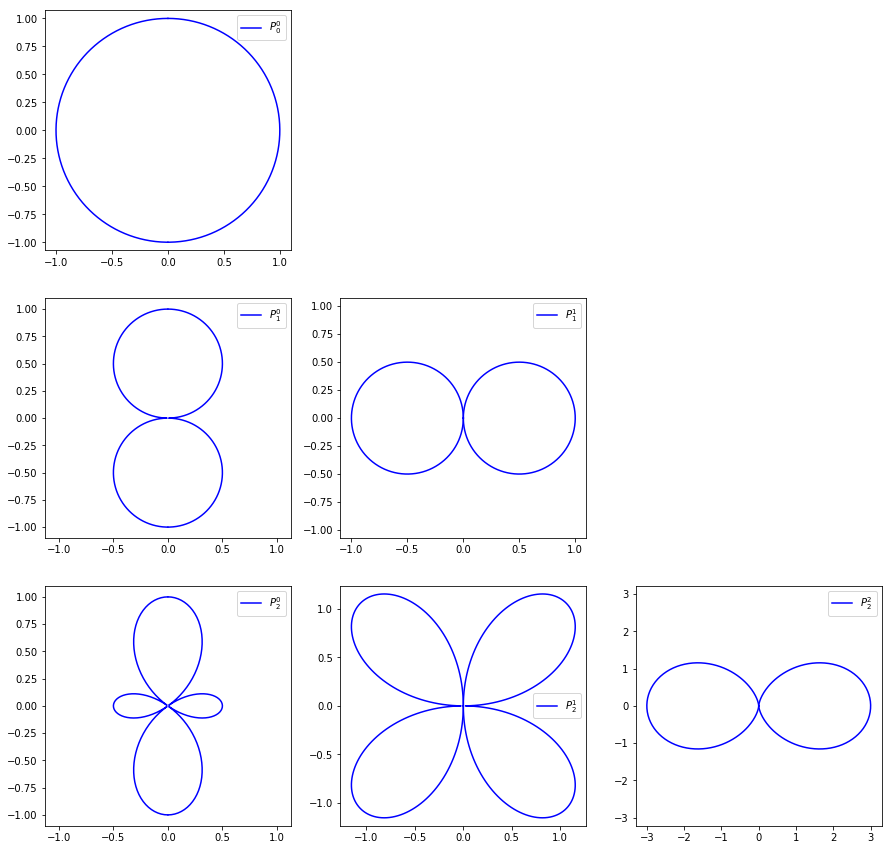

In [52]:
thetas = np.linspace(0, np.pi, 200)
theta_x = np.sin(thetas)
theta_y = np.cos(thetas)

fig = plt.figure(figsize = (15,15))

for n in range(3):
    for m in range(n+1):
        P_lm = sp.lpmv(m, n, np.cos(thetas))

        x_coords = theta_x*np.abs(P_lm)
        y_coords = theta_y*np.abs(P_lm)
        ax = fig.add_subplot(3, 3, m+1+3*n)
        ax.plot(x_coords, y_coords, 'b-', label='$P_{}^{}$'.format(n,m))
        # reflect the plot across the z-axis
        ax.plot(-x_coords, y_coords, 'b-')
        ax.axis('equal')
#         ax.set_title('$P_{}^{}$'.format(n,m))
        ax.legend()

<a id='refs'></a>

## References

- Boas, "Mathematical methods in the physical sciences", 3rd ed, chapter 12
- MathWorld, http://mathworld.wolfram.com/LegendrePolynomial.html and http://mathworld.wolfram.com/AssociatedLegendrePolynomial.html
- Wikipedia, https://en.wikipedia.org/wiki/Legendre_polynomials
- Binney & Tremaine, "Galactic Dynamics", 2nd ed, appendix C.5
- Griffiths & Schroeter, "Introduction to Quantum Mechanics", 3rd ed, section 4.1.2
- Mathews & Walker, "Mathematical Methods of Physics", 2nd ed, section 7.1